<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Churn_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Predict

Se você oferece o mesmo serviço que seu concorrente, e ainda, por um preço melhor, por que o cliente não fica com o seu serviço? 

Entender por que seus clientes abandonam o seu produto ou serviço é vital para conquistar um crescimento sustentável e lucrativo.

O `Churn Rate` pode lhe dar boas pistas sobre as escolhas dos clientes, mas afinal o que é isso???

Em uma tradução simples `Churn Rate` é a taxa de cancelamento, ou de abandono, registrada em sua base de clientes. por exemplo, para setores de serviço significa o cancelamento do serviço.

Embora tenha como principal função medir o percentual de clientes que abandonam um serviço, também serve para evidenciar o impacto negativo desses cancelamentos no caixa. Para alguns setores, esta é uma métrica básica para avaliar o sucesso do negócio, já que apresenta impacto direto no faturamento. Este é o caso dos serviços de assinatura. 

<center>
<img alt="Chrun Rate" width=50% src="https://marcusmarques.com.br/wp-content/uploads/2017/09/churn-rate.jpg" ></center>

É óbvio que a permanência ou não do cliente na empresa está relacionada a uma série de fatores. Mas a obrigação de todo gestor é partir do princípio de que o abandono foi causado por algum problema do seu lado do contrato.

Entender o *Churn* também pode auxiliar ao gestor identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Como o `Churn` tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios.

Nesse notebook irei demonstrar como analisar os dados disponível a fim de prever quando um cliente irá cancelar a assinatura do produto e iremos analisar quais variáveis influenciam mais ou menos o modelo de previsão. 

Assim, você como gestor de uma empresa poderá entender e focar esforços nas variáveis apropriadas. Afinal o mais difícil é o cliente entrar na loja, do que realizar a venda. Em outras palavras **o custo de aquisição de cliente (CAC) é mais alto que o custo para mantê-lo**.




## Aquisição e Exploração dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e retratam os dados de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).


In [2]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#link para os dados
link = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(link)

In [8]:
#verificando o dataset
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

Apesar de não haver informações explícitas disponíves, os nomes das colunas nos permitem algumas suposições:

 - A variável alvo, que classifica se o cliente cancelou a assinatura é a `Churn`;

 - A coluna CustomerID reprenta o chave única do cliente na base de dados e pode ser excluída, pois não interfere nossa análise;

 - A variável `tenure` está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade;

 - Apesar de não haver nenhuma documentação, assumo que a unidade de tempo utilizada é "mês";

 - Podemos-se observar ainda outras informações do cadastro do cliente como outros serviços contratados, dados sobre a forma de pagamento, tipo de contrato, valores da última fatura e o total acumulado;

Nos próximos passos iremos nos aprofundar um pouco mais no estudo desses dados:

In [9]:
df.drop("customerID", axis=1, inplace=True)

### Valores Ausentes

Vamos verifcar se o dataset possui dados ausentes, pois podem levar a erros nas interpretações futuras.

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Churn               0.0
TotalCharges        0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
gender              0.0
dtype: float64

In [11]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Pelo visto nosso dataset não possui valores ausentes.

Vamos aproveitar e verificar o tamanho do nosso dataset:

In [12]:
# identificar o volume de dados do DataFrame
print("Entradas ou linhas: \t {}.".format(df.shape[0]))
print("Variáveis ou colunas: \t {}.\n".format(df.shape[1]))

# verificar o tipo dos dados no dataset
display(df.dtypes)

Entradas ou linhas: 	 7043.
Variáveis ou colunas: 	 20.



gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Nosso dataset é composto por 7.043 entradas (linhas) e 21 variáveis(colunas).

Podemos observar que a variável `TotalCharges` está com a classificação errada. Esse é um ponto que precisaremos resolver mais adiante.

### Variáveis numéricas

Observando nossas variáveis numéricas, será possível formular algumas hipóteses para o nosso estudos?

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Pelas variáveis numéricas pode-se entender que a coluna `SeniorCitizen` possui valor mínimo 0 e máximo 1, podemos inferir que 1 significa um cliente na melhor idade (3ª idade) e 0 para o cliente que não se enquadra nessa categoria.

Conforme já apontado há algum erro na coluna `TotalCharges`, pois a mesma não apareceu no resumo númerico. 

Pelo método convencional para transformação não foi possível, pois alguns valores foram lançados errôneamente, portanto iremos montar uma função a fim de converter os dados na força.

In [13]:
def convert_str_float(coluna):
  """ função criada para converter a coluna TotalCharges
  #entrada: coluna com valores no formato string / object
  #saida: converte valores para float
      para valores inapropriados converte para NaN
    """

  try:
    return float(coluna)
  except ValueError:
    return np.nan

#cópia do dataframe
df_clean = df.copy()

#Convert a coluna TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(convert_str_float)

#Substituir os valores NaN pela mediana
TotalCharges_med = df_clean.TotalCharges.median()
df["TotalCharges"].fillna(TotalCharges_med, inplace=True)


Agora que convertermos nossa variável `TotalCharges` vamos verificar como está a distribuição dos valores totais pagos pelos clientes:

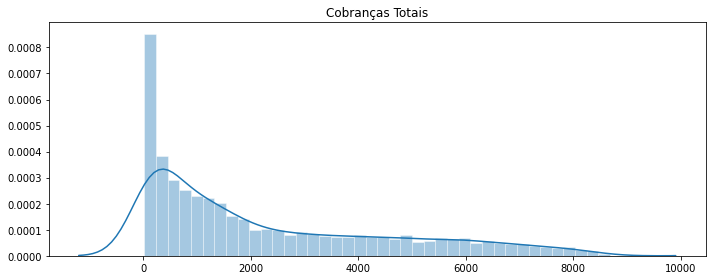

In [38]:
# gerando um gráfico de distribuição para a coluna 'TotalCharges'
fig, ax = plt.subplots(figsize = (10, 4))
sns.set_style('dark')
sns.distplot(df_clean['TotalCharges'], ax = ax, bins = 40)
ax.set_xlabel('')
ax.set_title('Cobranças Totais')
plt.tight_layout()


A coluna 'tenure' é referente ao número de meses em que o cliente contratou o serviço. A fim de inserirmos uma nova coluna categórica, criaremos uma coluna com faixas temporais de permanência no serviço. Para isto, criaremos uma nova função.

In [40]:
# criando uma função para classificação por faixa temporal

def set_tenure_category(v):
    
    if (v <= 12):
        return 'Tenure_0-12'
    elif (v > 12) & (v <= 24):
        return 'Tenure_13-24'
    elif (v > 24) & (v <= 48):
        return 'Tenure_25-48'
    elif (v > 48) & (v <= 60):
        return 'Tenure_49-60'
    elif (v > 60):
        return 'Tenure_qt_60'

In [41]:
df_ternure = df_clean.copy()
# criando uma nova coluna com os valores por faixa

df_ternure['tenure_group'] = df_ternure['tenure'].apply(set_tenure_category)

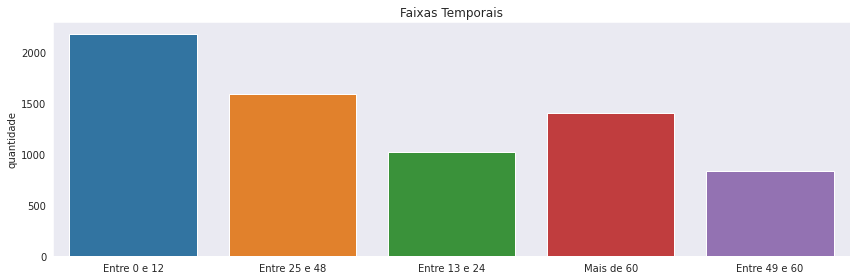

In [42]:

# gerando um gráfico de barras da coluna 'tenure_group'

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title('Faixas Temporais')
sns.countplot(df_ternure['tenure_group'], ax = ax)
ax.set_xticklabels(('Entre 0 e 12', 'Entre 25 e 48', 'Entre 13 e 24', 'Mais de 60', 'Entre 49 e 60'))
ax.set_xlabel('')
ax.set_ylabel('quantidade')
plt.tight_layout()

### Variável alvo

O foco desse estudo é a coluna `Churn`. Primeiramente vamos verificar a distribuição desses dados, a fim de verificar o balanceamento do nosso dataset.

In [15]:
# balanceamento das classes
print(df_clean.Churn.value_counts())
print("\nOs cancelamentos representam {:.2f}% do dataset.\n".format((df[df.Churn == "Yes"].shape[0] / df.shape[0]) * 100))

No     5174
Yes    1869
Name: Churn, dtype: int64

Os cancelamentos representam 26.54% do dataset.



Conforme o passo anteior demonstrou, possuímos um dataset **desbalanceado**. 

Somente 26% da amostra representa dados que foram obtidos e classificados como pessoas que desligaram / cancelaram seus serviços junto a operadora de Telecomunicações. Esse é um passo importante, pois adiante precisaremos lidar com esses desbalanceamento para que não interfira nos algorítmos de Machine Learning.

Caso queira enteder mais sobre o tratamento de dados desbalanceados o Carlos Melo fez esse [post](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/) com todos os detalhes.

## Correlações

Agora que corrigimos a variável `TotalChage` e identificamos as demais variáveis numéricas, vamos verificar a correlação entre elas e a variável `Churn` (nosso alvo).

<Figure size 576x360 with 0 Axes>

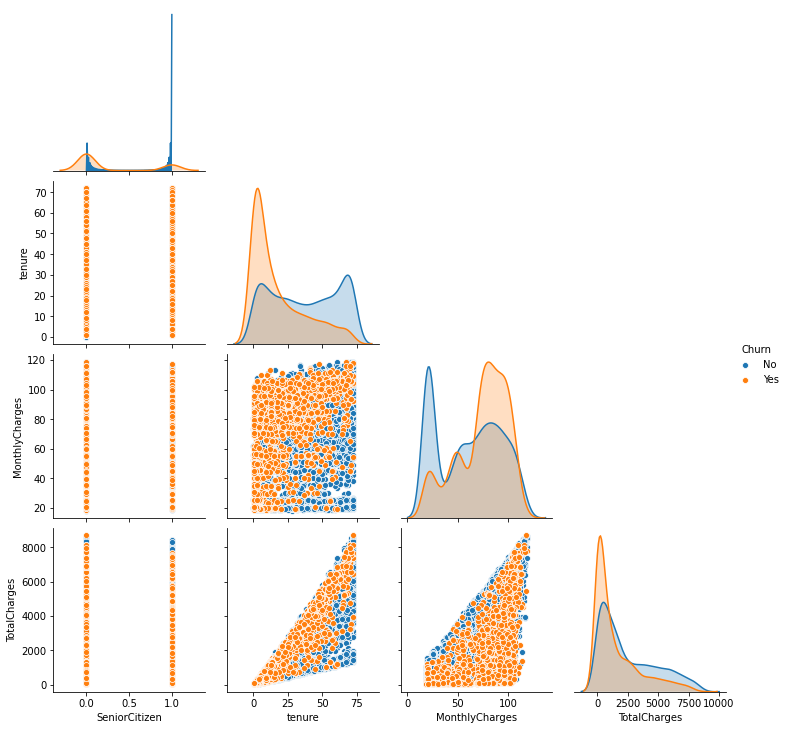

In [16]:
# Pairplot
plt.figure(figsize=(8, 5))
sns.pairplot(data = df_clean, corner = True, hue = 'Churn');
plt.savefig('churn-correlation.jpg')

Pela analise acima é possível verificar algumas correlações que contribuiem para as nossas hipóteses:
 - A categoria classificada como `SeniorCitizen` possui maior probabilidade de cancelamento do serviço;
 - Quanto menor o `ternure` maior a probabilidade de cancelamento do serviço

# Transformando Variáveis

Nos passos anteriores pudemos perceber, também, que temos 7 colunas categóricas binárias, 9 contendo 3 categorias diferentes e apenas uma com 4 categorias. Nosso dataset apresenta informações redundantes, pois possuimos uma coluna que indica se o cliente possui serviço de internet (InternetService) e outra se possui serviço telefônico (PhoneService) e também temos essas informações dentro de outras colunas categóricas (MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies).

Para utilizarmos o modelo de Regressão Logística, todas as variáveis categóricas precisam ser numéricas. 

Nos próximos passos iremos utilizar os dois métodos mais populares são da própria API do Scikit-Learning: LabelEnconding ou OneHotEnconding.




O primeiro passo será converter os valores da variável alvo.

In [17]:
# Separar os dados entre features matrix e target vector
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [18]:
# Convertendo as variáveis para inteiros 0,1.

y = pd.Series(np.where(y.values == 'Yes',1,0), y.index)

y.value_counts()

0    5174
1    1869
dtype: int64

Primeiramente iremos criar uma lista para receber todas as colunas que possuem dados categóricos.

In [19]:
#Verificando as colunas com informações categóricas
colunas_categoricas = [col for col in X.select_dtypes(exclude='number').columns]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## LabelEnconding
Nesse método todas as categorias são covertidadas para um número de acordo com quantidade de categorias dentro da coluna.

Por exemplo na variável `month` os dados armazenados serão convertidos para números de 1 a 12 (12 meses). Porém esse método pode influenciar na correlação entre as variáveis. O número 6 pode não ter um peso maior que o número 2 por exemplo.

No próximo passo utilizei o `LabelEnconder` de forma a armazenar num dicinário siginificado cada categoria, pois ao final iremos utilizar essa dicionário para verificar qual foi a categoria que influenciou mais no nosso modelo final de previsão.



In [20]:
#Ecoding o dataset
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#armazenando o dicionário de dados
label_dict = defaultdict(LabelEncoder)

#fit do enconder
label = LabelEncoder()

X = X.apply(lambda i: label_dict[i.name].fit_transform(i))


In [21]:
X.head()

gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  TotalCharges
0       0              0        1  ...              2             142            74
1       1              0        0  ...              3             498          3624
2       1              0        0  ...              3             436           536
3       1              0        0  ...              0             266          3570
4       0              0        0  ...              2             729           674

[5 rows x 19 columns]

Com mais esse passo executado todos os dados categóricos do nosso dataset foram convertidos para números.

Podemos checar o nosso dicionário de valores para as categorais que foram convertidas:

In [22]:
#Dicionário do encoder:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'Contract': LabelEncoder(),
             'Dependents': LabelEncoder(),
             'DeviceProtection': LabelEncoder(),
             'InternetService': LabelEncoder(),
             'MonthlyCharges': LabelEncoder(),
             'MultipleLines': LabelEncoder(),
             'OnlineBackup': LabelEncoder(),
             'OnlineSecurity': LabelEncoder(),
             'PaperlessBilling': LabelEncoder(),
             'Partner': LabelEncoder(),
             'PaymentMethod': LabelEncoder(),
             'PhoneService': LabelEncoder(),
             'SeniorCitizen': LabelEncoder(),
             'StreamingMovies': LabelEncoder(),
             'StreamingTV': LabelEncoder(),
             'TechSupport': LabelEncoder(),
             'TotalCharges': LabelEncoder(),
             'gender': LabelEncoder(),
             'tenure': LabelEncoder()})

## Dummies Variables

Já que transformamos todas as categorias em números, iremos dividir as colunas por categoria de valor.

Essa técnica irá expandir o nosso dataset em colunas adicionais, por exemplo antes tínhamos a variável `InternetService` agora teremos `InternetService_0` e `InternetService_1`. Esse passo é necessário, pois nesse caso  1 não é superior ao 0, são apenas duas categorias que foram convertidas.

In [23]:
#Identificar variáveis númericas
col_numb = [col for col in X.select_dtypes(['int', 'float']).columns.tolist() if col not in colunas_categoricas]

#como convertemos para colunas dummies iremos identificar novamente as colunas com apenas dois valores
col_dummies = X.nunique()[X.nunique() == 2].keys().tolist()

#Identificar colunas com mais de uma categoria
val_cate = [col for col in X.columns.tolist() if col not in col_dummies + col_numb]

In [24]:
val_cate

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [25]:
#Convertendo as variáveis dummies para colunas dummies
X = pd.get_dummies(X, columns = val_cate)


In [26]:
X.head()

gender  SeniorCitizen  ...  PaymentMethod_2  PaymentMethod_3
0       0              0  ...                1                0
1       1              0  ...                0                1
2       1              0  ...                0                1
3       1              0  ...                0                0
4       0              0  ...                1                0

[5 rows x 40 columns]

Perceberam como  número de colunas aumentou em relação ao dataset original?

In [28]:
X.fillna(X.mean(), inplace=True)

#Modelos

Após uma breve abordagem em relação as variáveis do dataset iremos aplicar alguns modelos de Machine Learning.

## Decision Tree

Primeiramente iremos adotar o modelo de DecisionTree ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado e pode ser usado tanto para classificação quanto para regressão.

Uma Decision Tree é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um split.

Optei por utilizar modelo de Decision Tree como ponto de partida, uma vez que não é necessário normalizar ou padronizar as variáveis. Assim poderemos comparar as métricas e avaliar como o nosso modelo está se saíndo.

Sobre métricas há esse [post](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) do Mario Filho que explica quais são as métricas mais utilizadas em modelos de ML.

In [30]:
#importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [31]:
#1. Escolha do modelo
from sklearn.ensemble import RandomForestClassifier

#2. Instanciar o modelo e optimizar hiperparâmetros
model_rf = RandomForestClassifier(max_depth=4, random_state=42)

#Separando os dados em features matrix e target vector

#3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#4. Fit do modelo
model_rf.fit(X_train, y_train)

#5. Previsões
y_pred_rf = model_rf.predict(X_test)


In [32]:
#Reservar a Acuracia para compararmos depois
acc_rf = accuracy_score(y_test,y_pred_rf)

#Verificando o Reporte de Classificação para o primeiro modelo
report_rf = classification_report(y_test, y_pred_rf, digits=2)
print("A acurácia do modelo é: {:.2}.\n".format(acc_rf))
print(report_rf)

A acurácia do modelo é: 0.79.

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1282
           1       0.71      0.38      0.50       479

    accuracy                           0.79      1761
   macro avg       0.76      0.66      0.68      1761
weighted avg       0.78      0.79      0.77      1761



No primeiro modelo obtive-se uma acurácia de 79% e precisão de 80% e 71% para permanecia ou cancelamento do cliente respectivamente.

## Outros Modelos de Machine Learning

Agora que temos um ponto de partida, podemos utilizar outros algorítimos de Machine Learning e tentar otimizá-los.

Iremos utilizar a função Ensemble para permitir a utilização de diversos modelos, antes será necessário normalizar e padronizar os dados para não influenciarem no resultado final.

In [33]:
#1. importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

#2. Instanciar os modelos e definir hyperparametros

model_xgbc = XGBClassifier()
model_sgd = SGDClassifier()
model_svc = SVC()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators =[('xgbc', model_xgbc), ('sgd', model_sgd), ('svc', model_svc),('dt', model_dt), ('lr', model_lr)], voting='hard')

#3. Separar os dados
#os dados já foram separados anteiormente

#3.1 Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#4. Fit do modelo
for model in (model_xgbc, model_sgd, model_svc, model_dt,model_lr, voting_clf):
  model.fit(X_train_scaled, y_train)

#5. Fazer previsões em cima dos dados
model = []
accuracy = []

for clf in (model_xgbc, model_sgd, model_svc, model_dt, model_lr, voting_clf):
  y_pred = clf.predict(X_test_scaled)
  model.append(clf.__class__.__name__)
  accuracy.append(accuracy_score(y_test,y_pred))

#6. Verifcando Acurácia dos modelos
col = ['Acuracia']
ac = pd.DataFrame(data=accuracy, index=model, columns=col)
ac

Acuracia
XGBClassifier           0.800681
SGDClassifier           0.784781
SVC                     0.803521
DecisionTreeClassifier  0.726860
LogisticRegression      0.806360
VotingClassifier        0.801249

Após a utilização do ensemble (em método de votação) conseguimos melhorar levemente nossa Acurácia na previsão, nosso modelo apresentou aproximadamente 80% de precisão.

### Cross Validation

Utilizando a metodologia de K Fold podemos dividir e otimizar a nossa amostra dados (dataset), procurando melhorar mais um pouco nosso resultado.

In [34]:
# Aplicando Validação Cruzada com K-Fold
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = voting_clf, X = X_train_scaled, y = y_train, cv = 10, verbose=3)
print("Acurácia: {:.2f} %".format(accuracies.mean()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.824, total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .................................... , score=0.822, total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .................................... , score=0.797, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.820, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.780, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.830, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.786, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.797, total=   1.7s
[CV]  ................................................................
[CV] .................................... , score=0.801, total=   1.7s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.4s finished


Utilizando a técnica Cross Validation ou Validação Cruzada, fizemos uma otimização dos nossos dados de entrada, sendo possível obter um leve melhora no desempenho do modelo. Acurácia = 80,5%.

## Otimização dos modelos

Podemos ainda refinar os nossos modelos através da otimização de hiperparâmetros.

Tal técnica refere-se à realização de uma pesquisa para descobrir o conjunto de argumentos de configuração de modelo específicos que resultam no melhor desempenho do modelo em um conjunto de dados específico.

### Grid Search

Até então utilizamos apenas as configurações *default* dos modelos matemáticos, entretanto podemos utilizar a função Grid Search e definir alguns parâmetros. A função `Grid Search` irá testar todas as combinações possível e verificar qual combinação irá obter o melhor resultar.

Observação: Defini a métrica de avaliação como `balanced_accuracy`, pois pela [documentação oficial](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) seria o melhor método para trabalharmos com dados desbalanceados.


In [72]:
#1. importar bibliotecas necessárias
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#2.Instanciar o modelo
xgb = XGBClassifier()

#3. definir intervalos para otimização
#3.1 Cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)
#3.2 Intervalos para otimização


param_grid = {

    'xgb__learning_rate': [0.001, 0.01, 0.05],
    'xgb__max_depth': [i / 10.0 for i in range(0, 5)],
    'xgb__gamma': [0.01, 0.1, 1],
    'xgb__max_delta_step': [0, 10] 
}

#3.3 gerar o modelo
grid = GridSearchCV(xgb, param_grid, n_jobs=-1, scoring="balanced_accuracy", cv=kfold, verbose=3)

#4. Fit do modelo
grid_result = grid.fit(X_train_scaled, y_train)


#5. ver resultados
print("Melhor acurácia: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.4min finished


Melhor acurácia: 0.7084518325392024 para {'xgb__gamma': 0.01, 'xgb__learning_rate': 0.001, 'xgb__max_delta_step': 0, 'xgb__max_depth': 0.0}


O método `Grid Search` é uma abordagem de força bruta que testa todas as combinações de hiperparâmetros para encontrar o melhor modelo. Seu tempo de execução explode com o número de valores (e combinações dos mesmos) para testar.

Ao executar os testes durante a elaboração deste notebook exagerei nas combinações possíveis e levei quase 2 horas para que o notebook respondesse e apresentasse o valor final, portanto não exagerem na quantidade de parâmetros.

### Scikit-Optimize

Além do método de Grid Search, podemos utilizar a biblioteca Scikit-Optimize é uma biblioteca Python de código aberto que fornece uma implementação de `Otimização Bayesiana` que pode ser usada para ajustar os hiperparâmetros de modelos de machine learning da biblioteca Python scikit-Learn.

Em contraste com GridSearchCV, nem todos os valores de parâmetro são testados, mas em vez disso, um número fixo de configurações de parâmetros é amostrado a partir do especificado distribuições.

O `Bayes Search` é a automação para *tunning* dos hyperparâmetros. É uma biblioteca relativamente nova que está em desenvolvimento e que facilita a nossa busca no refinamento dos hyperparâmetros.

In [47]:
!pip install scikit-optimize;

     |████████████████████████████████| 102kB 3.5MB/s 


In [48]:
# 1. importar as bibliotecas necessárias
import skopt
from skopt import BayesSearchCV

In [73]:
#2. Definir intervalos de otimziação
bayes = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        eval_metric = 'auc',
        silent=1,
        tree_method='auto'
    ),
    #2.1 Definindo intervalos de otimização
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    #2. definindo método de avaliação
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=10,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 6,   
    verbose = 0,
    refit = True,
    random_state = 42
)

# callback handler
def status_print_bayes(optim_result):
    bayes_resultado = bayes.best_score_
    print("Melhor resultado: %s", np.round(bayes_resultado,4))
    if bayes_resultado >= 0.98:
        print('Suficiente!')
        return True


In [74]:
#4. Fit no modelo
otmizador = bayes.fit(X_train_scaled, y_train, callback=status_print_bayes)

Melhor resultado: %s 0.7821
Melhor resultado: %s 0.8394
Melhor resultado: %s 0.8394
Melhor resultado: %s 0.841
Melhor resultado: %s 0.8431
Melhor resultado: %s 0.8431


In [75]:
print("Melhor ROC_AUC: {} para {}".format(bayes.best_score_, bayes.best_params_))

Melhor ROC_AUC: 0.8431014904200372 para OrderedDict([('colsample_bylevel', 0.8015579071911014), ('colsample_bytree', 0.44364889457651413), ('gamma', 3.811128976537413e-05), ('learning_rate', 0.2700390206185342), ('max_delta_step', 18), ('max_depth', 36), ('min_child_weight', 2), ('n_estimators', 83), ('reg_alpha', 1.5057560255472018e-06), ('reg_lambda', 659), ('scale_pos_weight', 256), ('subsample', 0.8835665823899177)])


Uma abordagem bayesiana diminui a probabilidade de que os valores escolhidos para o segundo modelo sejam parte da solução ótima. Agora ele usa as probabilidades atualizadas para selecionar um novo conjunto de valores para cada hiperparâmetro, ver se aumentou ou diminuiu a qualidade do modelo e atualizar as probabilidades. Em outras palavras, é mais provável que o algoritmo escolha valores para a próxima rodada que estão relacionados a um desempenho de modelo superior do que suas alternativas menos eficazes.

### Comparando os resultados obtidos

In [60]:
print("\n Parâmetros obtidos com Grid Search")
grid.best_params_


 Parâmetros obtidos com Grid Search


{'xgb__gamma': 0.01, 'xgb__learning_rate': 0.001, 'xgb__max_depth': 0.0}

In [76]:
print("\n Parâmetros obtidos com BayesSearch")
bayes.best_params_


 Parâmetros obtidos com BayesSearch


OrderedDict([('colsample_bylevel', 0.8015579071911014),
             ('colsample_bytree', 0.44364889457651413),
             ('gamma', 3.811128976537413e-05),
             ('learning_rate', 0.2700390206185342),
             ('max_delta_step', 18),
             ('max_depth', 36),
             ('min_child_weight', 2),
             ('n_estimators', 83),
             ('reg_alpha', 1.5057560255472018e-06),
             ('reg_lambda', 659),
             ('scale_pos_weight', 256),
             ('subsample', 0.8835665823899177)])

## Modelo otimizado

Feitas as otimizações e comparações. Iremo preparar nosso modelo final os dados serão novamente dividos, rebalanceados e o modelo final será treinado.

In [77]:
#1. Dividir dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#1.1 Padronizar os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#1.2 Rebalanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler;
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [63]:
!pip install scikit-plot

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.53      0.83      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761

AUC: 0.7800



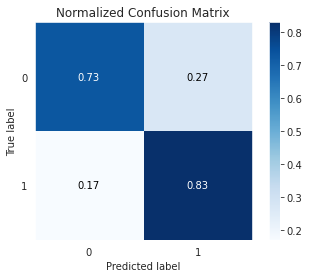

In [78]:
# 1. Definir o modelo e importar as bibliotecas necessárias
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.metrics import roc_auc_score, roc_curve

# 2. Instanciar o modelo e definir hyperparâmetros
modelo_final = XGBClassifier(
    learning_rate= 0.2700390206185342 , 
    n_estimators= 83,
    max_delta_step = 18, 
    max_depth= 36, 
    min_child_weight= 2, 
    gamma= 3.811128976537413e-05,
    colsample_bylevel = 0.8015579071911014,
    colsample_bytree = 0.44364889457651413,
    reg_lambda= 659,
    reg_alpha= 1.5057560255472018e-06,
    )


# 3. Fit do modelo
modelo_final.fit(X_train_rus, y_train_rus)

# 4. Fazer a previsão
X_test = scaler.transform(X_test)
y_pred = modelo_final.predict(X_test)

# 5.1 Classification Report
print(classification_report(y_test, y_pred))

# 5.2 imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# 5.3 plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


Optei por classificador ‘XGBClassifier’ devido as diversas possibilidades de refinamento. 

Se fosse necessário o *deploy* desse classifcador, bastaria utilizarmos o mesmo modelo com as utimizações que aqui criamos, validamos e testamos.

O classificador XGBoost otimizado obteve a performance com um Recall de 0.83%. No entanto, vale destacar que o Precision ficou baixo com um valor de 0.53. Isso significa que identificaríamos 83% dos clientes que realizariam churn, porém, também classificaríamos equivocadamente 36% dos clientes que não cancelariam os serviços. Ou seja, o trade-off entre Precision e Recall não ficou bom.

#Verificando como cada dado influência o classificador

SHAP (SHapley Additive exPlanations) é uma abordagem teórica de jogos para explicar a saída de qualquer modelo de Machine Learning. 

Com o SAP é possível verificar o peso que cada variável tem no classificador final. Com essa ferramenta é possível o gestor direcionar esforços nos itens que mais impactam o `Churn Rate`.

A expliação oficial, essa abordagem conecta a alocação de peso ideal com explicações locais usando os valores clássicos de Shapley da teoria dos jogos e suas extensões relacionadas.

[link para documentação oficial](https://github.com/slundberg/shap)

In [79]:
!pip install shap

     |████████████████████████████████| 327kB 4.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456463 sha256=ee8a7972ec673d359d14cfab7af9e6d3965ca928c199daf4eb71cafe389b7c7b
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [80]:
import shap
#Instanciando a ferramenta
explainer = shap.TreeExplainer(modelo_final)
#passando os dados de treinamento para que a ferramenta possa entender a influência de cada variável no modelo
shap_values = explainer.shap_values(X_train_rus)

In [ ]:
#verificando a influência de cada variável para um exemplo no modelo
shap.initjs() #no colab é necessário chamar a instância em todas as células
shap.force_plot(explainer.expected_value, shap_values, X_train_rus)

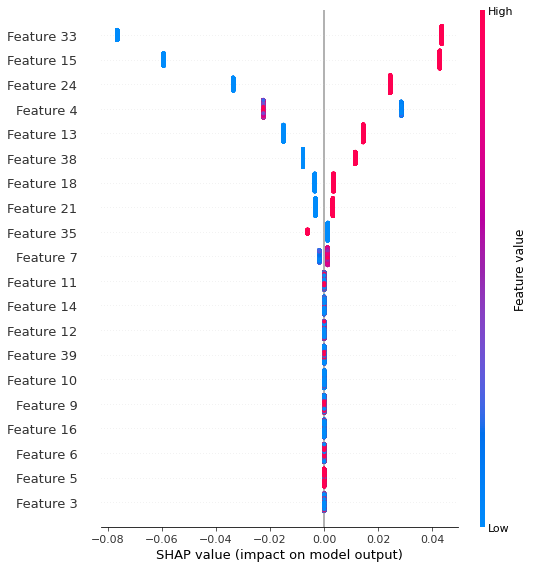

In [ ]:
#verificando o peso de cada variável no modelo de Machine Learning
shap.initjs() #no colab é necessário chamar a instância em todas as células
shap.summary_plot(shap_values, X_train_rus)

Agora que conseguimos idenficar quais variáveis mais influenciaram o nosso classificador final, podemos retornar e verificar a qual categoria essa variável estava assiada nos nossos dados originais.

Foi possivel verificar que as variáveis com maior influência no classifcador são as categorias 33, 15, 24 e 4. 

Adiante buscaremos quais são essas variáveis.

In [81]:
#cirar uma lista com as colunas que foram treinadas no modelo final
encoded_list = X.columns
#para facilitar a visualização será criado um novo dataset com a numeração para cada coluna
#Labels Dataframe
labels =  pd.DataFrame(
    {"labels" : encoded_list})
labels

labels
0               gender
1        SeniorCitizen
2              Partner
3           Dependents
4               tenure
5         PhoneService
6     PaperlessBilling
7       MonthlyCharges
8         TotalCharges
9      MultipleLines_0
10     MultipleLines_1
11     MultipleLines_2
12   InternetService_0
13   InternetService_1
14   InternetService_2
15    OnlineSecurity_0
16    OnlineSecurity_1
17    OnlineSecurity_2
18      OnlineBackup_0
19      OnlineBackup_1
20      OnlineBackup_2
21  DeviceProtection_0
22  DeviceProtection_1
23  DeviceProtection_2
24       TechSupport_0
25       TechSupport_1
26       TechSupport_2
27       StreamingTV_0
28       StreamingTV_1
29       StreamingTV_2
30   StreamingMovies_0
31   StreamingMovies_1
32   StreamingMovies_2
33          Contract_0
34          Contract_1
35          Contract_2
36     PaymentMethod_0
37     PaymentMethod_1
38     PaymentMethod_2
39     PaymentMethod_3

In [82]:
#Variável 33 equivale a variável Contrato com valor 0, que é:
label_dict['Contract'].inverse_transform([0])


array(['Month-to-month'], dtype=object)

In [83]:
#Variável 15 equivale a variável Contrato com valor 0, que é:
label_dict['OnlineSecurity'].inverse_transform([0])

array(['No'], dtype=object)

In [84]:
#Variável 24 equivale a variável Contrato com valor 0, que é:
label_dict['TechSupport'].inverse_transform([0])

array(['No'], dtype=object)

Portanto as variáveis que mais influenciaram no nosso modelo são:
  - Tipo de Contrato: Month to Month - contrato mensal
  - Online Security: No - o cliente não possui serviço adicional de segurança online
  - Tech Suport: No - o cliente não possui serviço adicional de suporte técnico
  -Ternure: conforme já observado novos clientes estão mais propensos a cancelar o serviço

#Conclusão

Compreender o `Churn Rate`, facilita para que gestores e equipes atuem antecipadamente para reduzir os índices de cancelamentos e, assim, ampliar a sua base de clientes.

No modelo matemático criado a partir da base de dados fornecida foi possível observar que clientes com contratos mensais, sem serviços adicionais como segurança online e suporte técnico são mais suscetíveis ao cancelamento do serviço. Com os insights obtidos a empresa pode direcionar seus esforços e custos em pontos críticos e assim modificar o `Churn Rate`.

